In [1]:
import numpy as np
import glob
import os

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from plotting import plot_log, plot_samples
from dataset import ImageDataset
import nets
from train import train_eval, train_eval_two_outputs

INPUT_DIR = 'data/VOCdevkit/VOC2007/JPEGImages/'
models_path = 'models'

torch.cuda.empty_cache()

## Step 1

In [2]:
filelist = glob.glob(INPUT_DIR + '*.jpg')

### Create datasets (saved locally):

In [3]:
def createImageDataSets(filelist, INPUT_DIR):
    for i in range(len(filelist)):
        img = cv2.imread(filelist[i])
        filename = os.path.basename(filelist[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        X_img = cv2.resize(img, (72, 72))
        cv2.imwrite(INPUT_DIR + 'X/' + filename, X_img)
        
        y_mid_img = cv2.resize(img, (144, 144))
        cv2.imwrite(INPUT_DIR + 'y_mid/' + filename, y_mid_img)
        
        y_large_img = cv2.resize(img, (288, 288))
        cv2.imwrite(INPUT_DIR + 'y_large/' + filename, y_large_img)
        

In [4]:
# createImageDataSets(filelist, INPUT_DIR)

### Load dataset:

In [3]:
transform = transforms.ToTensor()

In [4]:
dataset = ImageDataset(filelist, transforms=transform)

In [5]:
len(dataset)

5011

In [9]:
dataset.__getitem__(0)[0].shape

torch.Size([3, 72, 72])

### Show an example of the images:

In [8]:
def show_images(images):
    plt.figure(figsize=(20, 60))
    plt.subplot(1,3,1)
    plt.imshow(images[0].permute(1,2,0))
    plt.title('X image', fontsize=18)
    plt.subplot(1,3,2)
    plt.imshow(images[1].permute(1,2,0))
    plt.title('y_mid image', fontsize=18)
    plt.subplot(1,3,3)
    plt.imshow(images[2].permute(1,2,0))
    plt.title('y_large image', fontsize=18);

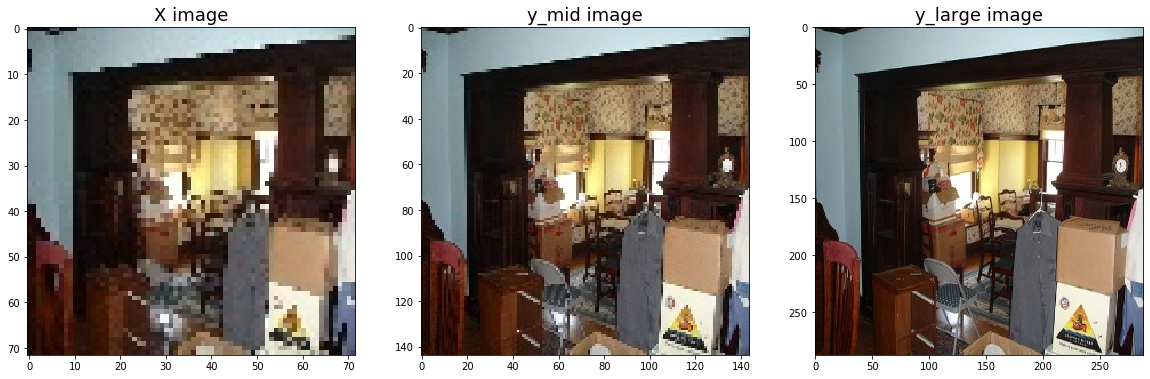

In [9]:
show_images(dataset.__getitem__(0))

### Create training and validation sets and loaders:

In [10]:
train_indices = list(range(1000,len(dataset)))
validation_indices = list(range(1000))

trainset = torch.utils.data.Subset(dataset, train_indices)

train_subset = torch.utils.data.Subset(trainset, list(range(100)))

valset = torch.utils.data.Subset(dataset, validation_indices)

In [11]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True, num_workers=0)

train_subloader = torch.utils.data.DataLoader(train_subset, batch_size=8, shuffle=True, num_workers=0)

valloader = torch.utils.data.DataLoader(valset, batch_size=8, shuffle=False, num_workers=0)

## Step 2

In [12]:
EPOCHS = 100

In [13]:
criterion = nn.MSELoss(reduction='none')

In [14]:
basenet = nets.BaseNet()
optimizer = optim.Adam(basenet.parameters())

In [15]:
log_basenet = train_eval(trainloader, 
                         valloader, 
                         basenet, 
                         criterion, 
                         optimizer, 
                         num_epochs=EPOCHS)

torch.save(basenet, os.path.join(models_path, 'basenet.pt'))


===> Epoch 1 Complete: Avg. Loss: 0.0100



===> Avg. PSNR: 22.2510 dB



===> Epoch 2 Complete: Avg. Loss: 0.0070



===> Avg. PSNR: 22.5645 dB



===> Epoch 3 Complete: Avg. Loss: 0.0069



===> Avg. PSNR: 22.5644 dB



===> Epoch 4 Complete: Avg. Loss: 0.0068



===> Avg. PSNR: 22.7064 dB



===> Epoch 5 Complete: Avg. Loss: 0.0068



===> Avg. PSNR: 22.6991 dB



===> Epoch 6 Complete: Avg. Loss: 0.0068



===> Avg. PSNR: 22.7254 dB



===> Epoch 7 Complete: Avg. Loss: 0.0067



===> Avg. PSNR: 22.7755 dB



===> Epoch 8 Complete: Avg. Loss: 0.0067



===> Avg. PSNR: 22.7771 dB



===> Epoch 9 Complete: Avg. Loss: 0.0067



===> Avg. PSNR: 22.7602 dB



===> Epoch 10 Complete: Avg. Loss: 0.0067



===> Avg. PSNR: 22.8125 dB



===> Epoch 11 Complete: Avg. Loss: 0.0067



===> Avg. PSNR: 22.8071 dB



===> Epoch 12 Complete: Avg. Loss: 0.0067



===> Avg. PSNR: 22.8160 dB



===> Epoch 13 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8553 dB



===> Epoch 14 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8427 dB



===> Epoch 15 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8470 dB



===> Epoch 16 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8081 dB



===> Epoch 17 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8925 dB



===> Epoch 18 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8884 dB



===> Epoch 19 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8366 dB



===> Epoch 20 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8712 dB



===> Epoch 21 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8810 dB



===> Epoch 22 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8753 dB



===> Epoch 23 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.9059 dB



===> Epoch 24 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8971 dB



===> Epoch 25 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8256 dB



===> Epoch 26 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.9124 dB



===> Epoch 27 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8187 dB



===> Epoch 28 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.8770 dB



===> Epoch 29 Complete: Avg. Loss: 0.0066



===> Avg. PSNR: 22.9057 dB



===> Epoch 30 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9108 dB



===> Epoch 31 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9077 dB



===> Epoch 32 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9079 dB



===> Epoch 33 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.8546 dB



===> Epoch 34 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9303 dB



===> Epoch 35 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9200 dB



===> Epoch 36 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9401 dB



===> Epoch 37 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9477 dB



===> Epoch 38 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9098 dB



===> Epoch 39 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.8862 dB



===> Epoch 40 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9462 dB



===> Epoch 41 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9539 dB



===> Epoch 42 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.8848 dB



===> Epoch 43 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9568 dB



===> Epoch 44 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9465 dB



===> Epoch 45 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9395 dB



===> Epoch 46 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.7792 dB



===> Epoch 47 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9404 dB



===> Epoch 48 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9529 dB



===> Epoch 49 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9779 dB



===> Epoch 50 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9239 dB



===> Epoch 51 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9682 dB



===> Epoch 52 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9450 dB



===> Epoch 53 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9790 dB



===> Epoch 54 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9412 dB



===> Epoch 55 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9252 dB



===> Epoch 56 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.8813 dB



===> Epoch 57 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9482 dB



===> Epoch 58 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.8991 dB



===> Epoch 59 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9454 dB



===> Epoch 60 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9617 dB



===> Epoch 61 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9948 dB



===> Epoch 62 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9541 dB



===> Epoch 63 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9678 dB



===> Epoch 64 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9622 dB



===> Epoch 65 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9938 dB



===> Epoch 66 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9675 dB



===> Epoch 67 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9691 dB



===> Epoch 68 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.8895 dB



===> Epoch 69 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9802 dB



===> Epoch 70 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9902 dB



===> Epoch 71 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9977 dB



===> Epoch 72 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9754 dB



===> Epoch 73 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9846 dB



===> Epoch 74 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9505 dB



===> Epoch 75 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 22.9776 dB



===> Epoch 76 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 23.0001 dB



===> Epoch 77 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0212 dB



===> Epoch 78 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 22.9837 dB



===> Epoch 79 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 23.0170 dB



===> Epoch 80 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 23.0246 dB



===> Epoch 81 Complete: Avg. Loss: 0.0065



===> Avg. PSNR: 23.0083 dB



===> Epoch 82 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0050 dB



===> Epoch 83 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0109 dB



===> Epoch 84 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 22.9602 dB



===> Epoch 85 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0164 dB



===> Epoch 86 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 22.9779 dB



===> Epoch 87 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 22.9571 dB



===> Epoch 88 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0210 dB



===> Epoch 89 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0262 dB



===> Epoch 90 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0282 dB



===> Epoch 91 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0204 dB



===> Epoch 92 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0335 dB



===> Epoch 93 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 22.9626 dB



===> Epoch 94 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0265 dB



===> Epoch 95 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0382 dB



===> Epoch 96 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0014 dB



===> Epoch 97 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 22.9971 dB



===> Epoch 98 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0313 dB



===> Epoch 99 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0325 dB



===> Epoch 100 Complete: Avg. Loss: 0.0064



===> Avg. PSNR: 23.0223 dB


C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BaseNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LeakyReLU. It won't be checked for correctness upon loading.
  "type " + obj.

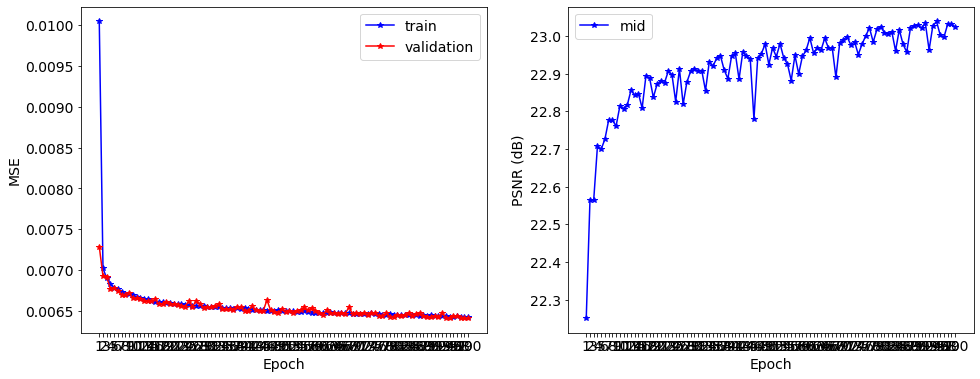

In [16]:
plot_log(log_basenet)

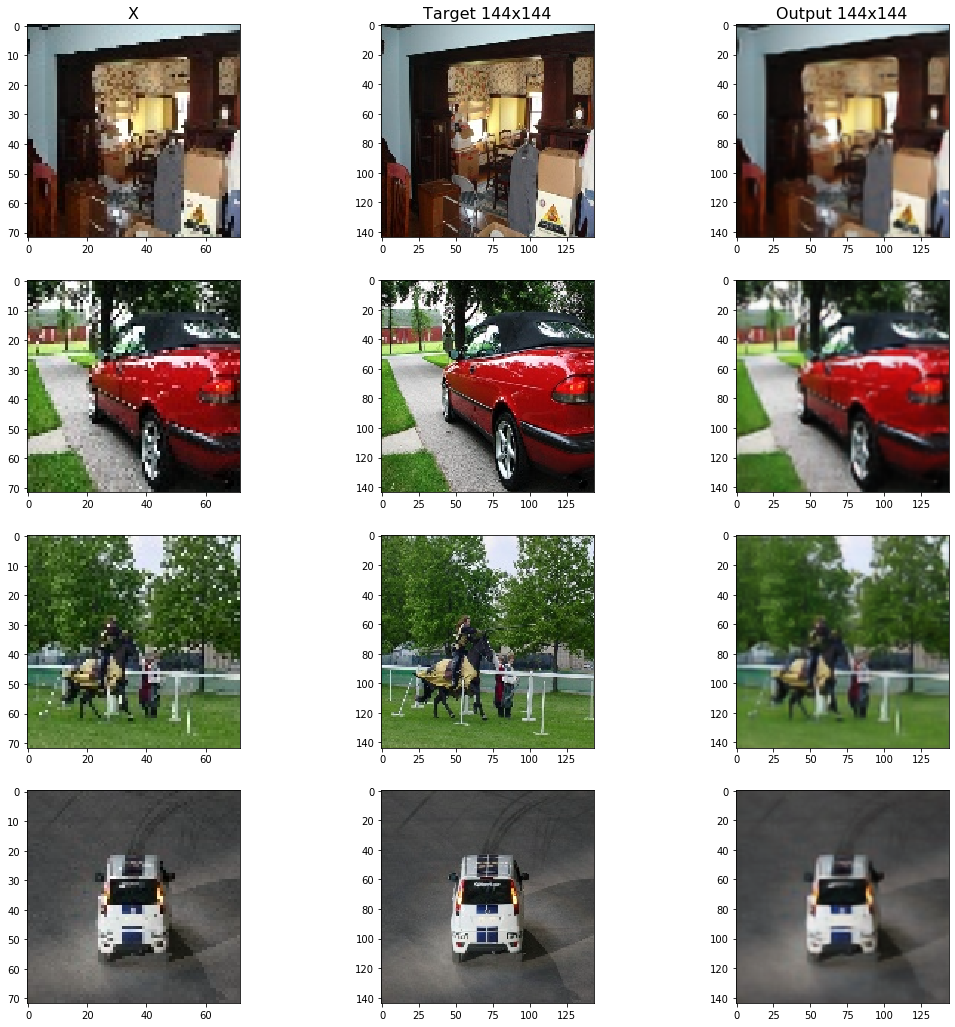

In [17]:
plot_samples(basenet, valloader)

## Step 3

In [18]:
midlargenet = nets.MidLargeNet()
optimizer = optim.Adam(midlargenet.parameters())

In [19]:
log_midlargenet = train_eval_two_outputs(trainloader, 
                                         valloader, 
                                         midlargenet, 
                                         criterion, 
                                         optimizer, 
                                         num_epochs=EPOCHS)

torch.save(midlargenet, os.path.join(models_path, 'midlargenet.pt'))


===> Epoch 1 Complete: Avg. Loss: 0.0221



===> Avg. PSNR-Mid: 22.4690 dB, Avg. PSNR-Large: 22.5631 dB



===> Epoch 2 Complete: Avg. Loss: 0.0137



===> Avg. PSNR-Mid: 22.6434 dB, Avg. PSNR-Large: 22.7602 dB



===> Epoch 3 Complete: Avg. Loss: 0.0135



===> Avg. PSNR-Mid: 22.7319 dB, Avg. PSNR-Large: 22.8505 dB



===> Epoch 4 Complete: Avg. Loss: 0.0133



===> Avg. PSNR-Mid: 22.7324 dB, Avg. PSNR-Large: 22.8761 dB



===> Epoch 5 Complete: Avg. Loss: 0.0132



===> Avg. PSNR-Mid: 22.7929 dB, Avg. PSNR-Large: 22.9289 dB



===> Epoch 6 Complete: Avg. Loss: 0.0131



===> Avg. PSNR-Mid: 22.7394 dB, Avg. PSNR-Large: 22.8734 dB



===> Epoch 7 Complete: Avg. Loss: 0.0131



===> Avg. PSNR-Mid: 22.8188 dB, Avg. PSNR-Large: 22.9645 dB



===> Epoch 8 Complete: Avg. Loss: 0.0131



===> Avg. PSNR-Mid: 22.8250 dB, Avg. PSNR-Large: 22.9743 dB



===> Epoch 9 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.8181 dB, Avg. PSNR-Large: 22.9659 dB



===> Epoch 10 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.7511 dB, Avg. PSNR-Large: 22.8975 dB



===> Epoch 11 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.8199 dB, Avg. PSNR-Large: 22.9652 dB



===> Epoch 12 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.8773 dB, Avg. PSNR-Large: 23.0254 dB



===> Epoch 13 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.6406 dB, Avg. PSNR-Large: 22.7834 dB



===> Epoch 14 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8407 dB, Avg. PSNR-Large: 22.9877 dB



===> Epoch 15 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8609 dB, Avg. PSNR-Large: 23.0142 dB



===> Epoch 16 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8196 dB, Avg. PSNR-Large: 22.9681 dB



===> Epoch 17 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8928 dB, Avg. PSNR-Large: 23.0398 dB



===> Epoch 18 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8849 dB, Avg. PSNR-Large: 23.0359 dB



===> Epoch 19 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.8755 dB, Avg. PSNR-Large: 23.0184 dB



===> Epoch 20 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9225 dB, Avg. PSNR-Large: 23.0667 dB



===> Epoch 21 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9301 dB, Avg. PSNR-Large: 23.0720 dB



===> Epoch 22 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.8818 dB, Avg. PSNR-Large: 23.0382 dB



===> Epoch 23 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9147 dB, Avg. PSNR-Large: 23.0594 dB



===> Epoch 24 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9436 dB, Avg. PSNR-Large: 23.0849 dB



===> Epoch 25 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9339 dB, Avg. PSNR-Large: 23.0827 dB



===> Epoch 26 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9480 dB, Avg. PSNR-Large: 23.0917 dB



===> Epoch 27 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9427 dB, Avg. PSNR-Large: 23.0804 dB



===> Epoch 28 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9505 dB, Avg. PSNR-Large: 23.0920 dB



===> Epoch 29 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9557 dB, Avg. PSNR-Large: 23.0979 dB



===> Epoch 30 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9587 dB, Avg. PSNR-Large: 23.0945 dB



===> Epoch 31 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.8918 dB, Avg. PSNR-Large: 23.0257 dB



===> Epoch 32 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9591 dB, Avg. PSNR-Large: 23.1057 dB



===> Epoch 33 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9510 dB, Avg. PSNR-Large: 23.0948 dB



===> Epoch 34 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.8509 dB, Avg. PSNR-Large: 22.9816 dB



===> Epoch 35 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.8598 dB, Avg. PSNR-Large: 23.0037 dB



===> Epoch 36 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9355 dB, Avg. PSNR-Large: 23.0753 dB



===> Epoch 37 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9627 dB, Avg. PSNR-Large: 23.1018 dB



===> Epoch 38 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9814 dB, Avg. PSNR-Large: 23.1175 dB



===> Epoch 39 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9611 dB, Avg. PSNR-Large: 23.1011 dB



===> Epoch 40 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9278 dB, Avg. PSNR-Large: 23.0596 dB



===> Epoch 41 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9806 dB, Avg. PSNR-Large: 23.1186 dB



===> Epoch 42 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9759 dB, Avg. PSNR-Large: 23.1196 dB



===> Epoch 43 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9731 dB, Avg. PSNR-Large: 23.1156 dB



===> Epoch 44 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9814 dB, Avg. PSNR-Large: 23.1222 dB



===> Epoch 45 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9806 dB, Avg. PSNR-Large: 23.1197 dB



===> Epoch 46 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9724 dB, Avg. PSNR-Large: 23.1134 dB



===> Epoch 47 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 23.0004 dB, Avg. PSNR-Large: 23.1392 dB



===> Epoch 48 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9654 dB, Avg. PSNR-Large: 23.1075 dB



===> Epoch 49 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 23.0050 dB, Avg. PSNR-Large: 23.1458 dB



===> Epoch 50 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9785 dB, Avg. PSNR-Large: 23.1202 dB



===> Epoch 51 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9254 dB, Avg. PSNR-Large: 23.0643 dB



===> Epoch 52 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 23.0063 dB, Avg. PSNR-Large: 23.1450 dB



===> Epoch 53 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9771 dB, Avg. PSNR-Large: 23.1184 dB



===> Epoch 54 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9455 dB, Avg. PSNR-Large: 23.0739 dB



===> Epoch 55 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 23.0074 dB, Avg. PSNR-Large: 23.1483 dB



===> Epoch 56 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9849 dB, Avg. PSNR-Large: 23.1262 dB



===> Epoch 57 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9734 dB, Avg. PSNR-Large: 23.1147 dB



===> Epoch 58 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9997 dB, Avg. PSNR-Large: 23.1386 dB



===> Epoch 59 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9969 dB, Avg. PSNR-Large: 23.1371 dB



===> Epoch 60 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 23.0054 dB, Avg. PSNR-Large: 23.1469 dB



===> Epoch 61 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9884 dB, Avg. PSNR-Large: 23.1377 dB



===> Epoch 62 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9356 dB, Avg. PSNR-Large: 23.0859 dB



===> Epoch 63 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9984 dB, Avg. PSNR-Large: 23.1395 dB



===> Epoch 64 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9875 dB, Avg. PSNR-Large: 23.1246 dB



===> Epoch 65 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9933 dB, Avg. PSNR-Large: 23.1275 dB



===> Epoch 66 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9420 dB, Avg. PSNR-Large: 23.0763 dB



===> Epoch 67 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0138 dB, Avg. PSNR-Large: 23.1578 dB



===> Epoch 68 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9929 dB, Avg. PSNR-Large: 23.1297 dB



===> Epoch 69 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9930 dB, Avg. PSNR-Large: 23.1360 dB



===> Epoch 70 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9995 dB, Avg. PSNR-Large: 23.1422 dB



===> Epoch 71 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0086 dB, Avg. PSNR-Large: 23.1500 dB



===> Epoch 72 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0118 dB, Avg. PSNR-Large: 23.1553 dB



===> Epoch 73 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9701 dB, Avg. PSNR-Large: 23.1209 dB



===> Epoch 74 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9980 dB, Avg. PSNR-Large: 23.1369 dB



===> Epoch 75 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9985 dB, Avg. PSNR-Large: 23.1378 dB



===> Epoch 76 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0204 dB, Avg. PSNR-Large: 23.1587 dB



===> Epoch 77 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0081 dB, Avg. PSNR-Large: 23.1504 dB



===> Epoch 78 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9179 dB, Avg. PSNR-Large: 23.0561 dB



===> Epoch 79 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0150 dB, Avg. PSNR-Large: 23.1535 dB



===> Epoch 80 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0068 dB, Avg. PSNR-Large: 23.1534 dB



===> Epoch 81 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0092 dB, Avg. PSNR-Large: 23.1449 dB



===> Epoch 82 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0205 dB, Avg. PSNR-Large: 23.1533 dB



===> Epoch 83 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0198 dB, Avg. PSNR-Large: 23.1606 dB



===> Epoch 84 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0333 dB, Avg. PSNR-Large: 23.1746 dB



===> Epoch 85 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0402 dB, Avg. PSNR-Large: 23.1807 dB



===> Epoch 86 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0217 dB, Avg. PSNR-Large: 23.1654 dB



===> Epoch 87 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0280 dB, Avg. PSNR-Large: 23.1723 dB



===> Epoch 88 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0086 dB, Avg. PSNR-Large: 23.1384 dB



===> Epoch 89 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0129 dB, Avg. PSNR-Large: 23.1572 dB



===> Epoch 90 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0133 dB, Avg. PSNR-Large: 23.1572 dB



===> Epoch 91 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0060 dB, Avg. PSNR-Large: 23.1486 dB



===> Epoch 92 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0302 dB, Avg. PSNR-Large: 23.1618 dB



===> Epoch 93 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0389 dB, Avg. PSNR-Large: 23.1798 dB



===> Epoch 94 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0241 dB, Avg. PSNR-Large: 23.1681 dB



===> Epoch 95 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0336 dB, Avg. PSNR-Large: 23.1785 dB



===> Epoch 96 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0266 dB, Avg. PSNR-Large: 23.1687 dB



===> Epoch 97 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9522 dB, Avg. PSNR-Large: 23.1160 dB



===> Epoch 98 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9863 dB, Avg. PSNR-Large: 23.1251 dB



===> Epoch 99 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0069 dB, Avg. PSNR-Large: 23.1497 dB



===> Epoch 100 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9641 dB, Avg. PSNR-Large: 23.1189 dB


C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MidLargeNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


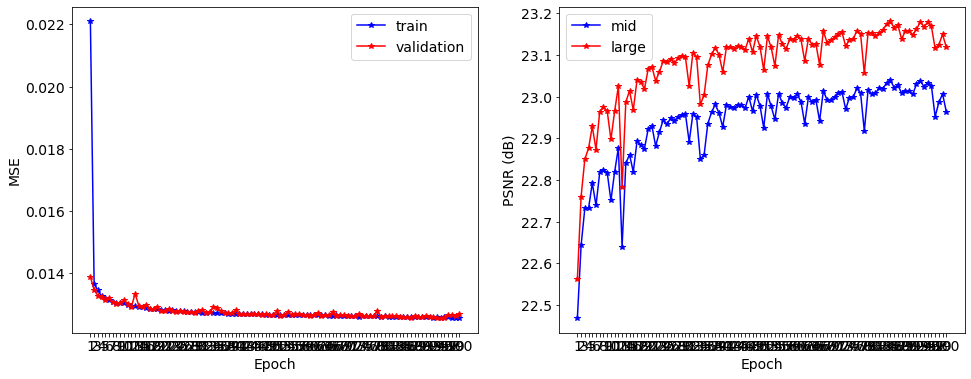

In [20]:
plot_log(log_midlargenet)

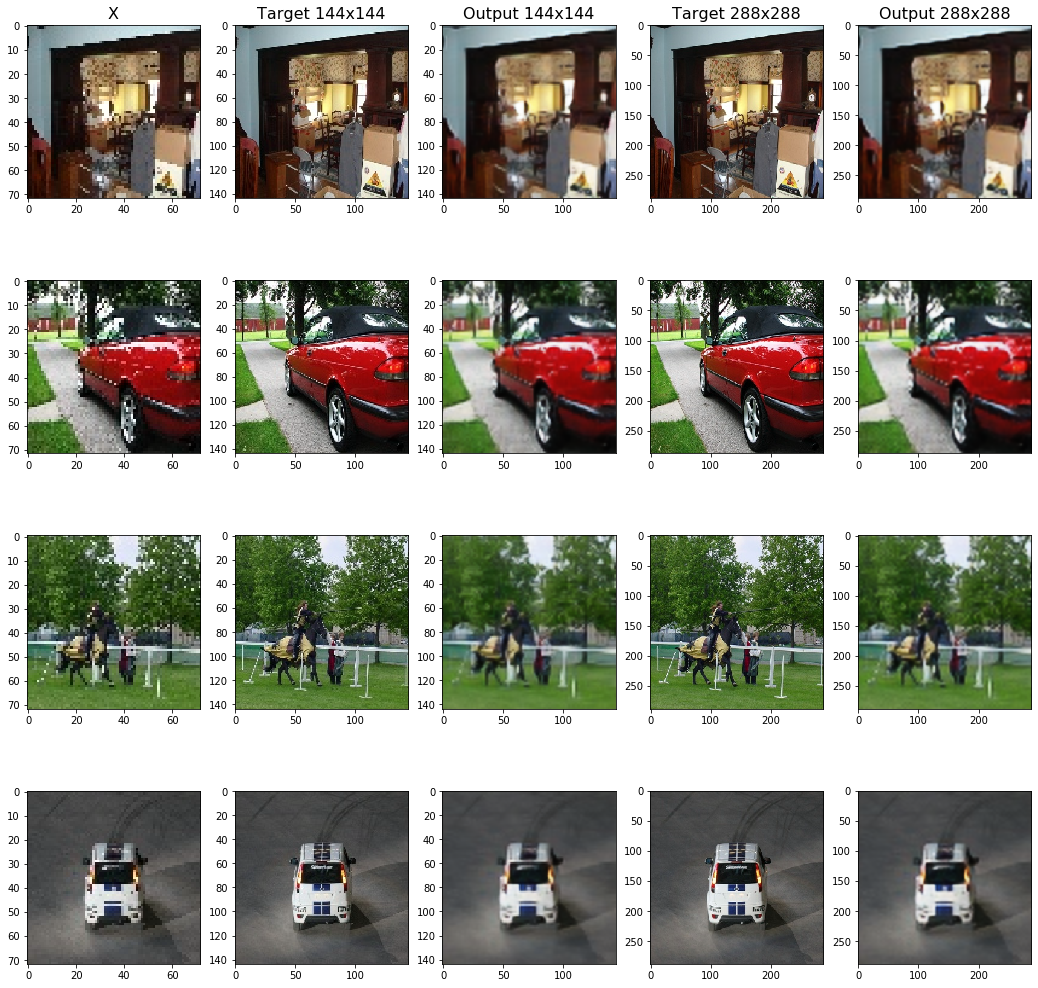

In [21]:
plot_samples(midlargenet, valloader)

## Step 4

In [22]:
residualnet = nets.ResidualNet()
optimizer = optim.Adam(residualnet.parameters())

In [23]:
log_residualnet = train_eval_two_outputs(trainloader, 
                                      valloader, 
                                      residualnet, 
                                      criterion, 
                                      optimizer, 
                                      num_epochs=EPOCHS)

torch.save(residualnet, os.path.join(models_path, 'residualnet.pt'))


===> Epoch 1 Complete: Avg. Loss: 0.0195



===> Avg. PSNR-Mid: 22.5486 dB, Avg. PSNR-Large: 22.6376 dB



===> Epoch 2 Complete: Avg. Loss: 0.0136



===> Avg. PSNR-Mid: 22.6775 dB, Avg. PSNR-Large: 22.8036 dB



===> Epoch 3 Complete: Avg. Loss: 0.0133



===> Avg. PSNR-Mid: 22.6533 dB, Avg. PSNR-Large: 22.6190 dB



===> Epoch 4 Complete: Avg. Loss: 0.0132



===> Avg. PSNR-Mid: 22.8045 dB, Avg. PSNR-Large: 22.9165 dB



===> Epoch 5 Complete: Avg. Loss: 0.0131



===> Avg. PSNR-Mid: 22.8373 dB, Avg. PSNR-Large: 22.9946 dB



===> Epoch 6 Complete: Avg. Loss: 0.0131



===> Avg. PSNR-Mid: 22.7593 dB, Avg. PSNR-Large: 22.8965 dB



===> Epoch 7 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.7164 dB, Avg. PSNR-Large: 22.8542 dB



===> Epoch 8 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.7757 dB, Avg. PSNR-Large: 22.7741 dB



===> Epoch 9 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8948 dB, Avg. PSNR-Large: 23.0886 dB



===> Epoch 10 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9310 dB, Avg. PSNR-Large: 23.0918 dB



===> Epoch 11 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.8615 dB, Avg. PSNR-Large: 23.0170 dB



===> Epoch 12 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.8840 dB, Avg. PSNR-Large: 23.1000 dB



===> Epoch 13 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9585 dB, Avg. PSNR-Large: 23.1757 dB



===> Epoch 14 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9139 dB, Avg. PSNR-Large: 23.1176 dB



===> Epoch 15 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9194 dB, Avg. PSNR-Large: 23.1549 dB



===> Epoch 16 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9782 dB, Avg. PSNR-Large: 23.1855 dB



===> Epoch 17 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9696 dB, Avg. PSNR-Large: 23.1828 dB



===> Epoch 18 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9283 dB, Avg. PSNR-Large: 23.1393 dB



===> Epoch 19 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9576 dB, Avg. PSNR-Large: 23.2192 dB



===> Epoch 20 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9258 dB, Avg. PSNR-Large: 23.1430 dB



===> Epoch 21 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9832 dB, Avg. PSNR-Large: 23.2359 dB



===> Epoch 22 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9866 dB, Avg. PSNR-Large: 23.2498 dB



===> Epoch 23 Complete: Avg. Loss: 0.0125



===> Avg. PSNR-Mid: 23.0084 dB, Avg. PSNR-Large: 23.2867 dB



===> Epoch 24 Complete: Avg. Loss: 0.0125



===> Avg. PSNR-Mid: 22.9483 dB, Avg. PSNR-Large: 23.2103 dB



===> Epoch 25 Complete: Avg. Loss: 0.0125



===> Avg. PSNR-Mid: 22.9871 dB, Avg. PSNR-Large: 23.2644 dB



===> Epoch 26 Complete: Avg. Loss: 0.0125



===> Avg. PSNR-Mid: 22.8886 dB, Avg. PSNR-Large: 23.1777 dB



===> Epoch 27 Complete: Avg. Loss: 0.0125



===> Avg. PSNR-Mid: 23.0168 dB, Avg. PSNR-Large: 23.3004 dB



===> Epoch 28 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 23.0178 dB, Avg. PSNR-Large: 23.3113 dB



===> Epoch 29 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 22.9442 dB, Avg. PSNR-Large: 23.2243 dB



===> Epoch 30 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 22.9856 dB, Avg. PSNR-Large: 23.2490 dB



===> Epoch 31 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 23.0044 dB, Avg. PSNR-Large: 23.3014 dB



===> Epoch 32 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 23.0231 dB, Avg. PSNR-Large: 23.3105 dB



===> Epoch 33 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 22.9045 dB, Avg. PSNR-Large: 23.1784 dB



===> Epoch 34 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 22.9756 dB, Avg. PSNR-Large: 23.2454 dB



===> Epoch 35 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 22.9629 dB, Avg. PSNR-Large: 23.2844 dB



===> Epoch 36 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 22.9063 dB, Avg. PSNR-Large: 23.2348 dB



===> Epoch 37 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 22.9490 dB, Avg. PSNR-Large: 23.2547 dB



===> Epoch 38 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 23.0138 dB, Avg. PSNR-Large: 23.3196 dB



===> Epoch 39 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 23.0397 dB, Avg. PSNR-Large: 23.3499 dB



===> Epoch 40 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0213 dB, Avg. PSNR-Large: 23.3172 dB



===> Epoch 41 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0556 dB, Avg. PSNR-Large: 23.3634 dB



===> Epoch 42 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0731 dB, Avg. PSNR-Large: 23.3807 dB



===> Epoch 43 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0495 dB, Avg. PSNR-Large: 23.3484 dB



===> Epoch 44 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0452 dB, Avg. PSNR-Large: 23.3519 dB



===> Epoch 45 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0264 dB, Avg. PSNR-Large: 23.3190 dB



===> Epoch 46 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0490 dB, Avg. PSNR-Large: 23.3459 dB



===> Epoch 47 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0157 dB, Avg. PSNR-Large: 23.3057 dB



===> Epoch 48 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0515 dB, Avg. PSNR-Large: 23.3512 dB



===> Epoch 49 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0220 dB, Avg. PSNR-Large: 23.3304 dB



===> Epoch 50 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0739 dB, Avg. PSNR-Large: 23.3886 dB



===> Epoch 51 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0101 dB, Avg. PSNR-Large: 23.3279 dB



===> Epoch 52 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0390 dB, Avg. PSNR-Large: 23.3353 dB



===> Epoch 53 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0323 dB, Avg. PSNR-Large: 23.3489 dB



===> Epoch 54 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0753 dB, Avg. PSNR-Large: 23.3841 dB



===> Epoch 55 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0893 dB, Avg. PSNR-Large: 23.4152 dB



===> Epoch 56 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0511 dB, Avg. PSNR-Large: 23.3730 dB



===> Epoch 57 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0520 dB, Avg. PSNR-Large: 23.3389 dB



===> Epoch 58 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0480 dB, Avg. PSNR-Large: 23.3539 dB



===> Epoch 59 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0869 dB, Avg. PSNR-Large: 23.4066 dB



===> Epoch 60 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0753 dB, Avg. PSNR-Large: 23.3876 dB



===> Epoch 61 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0947 dB, Avg. PSNR-Large: 23.4110 dB



===> Epoch 62 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0807 dB, Avg. PSNR-Large: 23.3947 dB



===> Epoch 63 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0829 dB, Avg. PSNR-Large: 23.4033 dB



===> Epoch 64 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0894 dB, Avg. PSNR-Large: 23.3978 dB



===> Epoch 65 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0964 dB, Avg. PSNR-Large: 23.4129 dB



===> Epoch 66 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0694 dB, Avg. PSNR-Large: 23.3824 dB



===> Epoch 67 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0937 dB, Avg. PSNR-Large: 23.4020 dB



===> Epoch 68 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.1035 dB, Avg. PSNR-Large: 23.4148 dB



===> Epoch 69 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0911 dB, Avg. PSNR-Large: 23.4137 dB



===> Epoch 70 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0878 dB, Avg. PSNR-Large: 23.4084 dB



===> Epoch 71 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0114 dB, Avg. PSNR-Large: 23.3229 dB



===> Epoch 72 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0633 dB, Avg. PSNR-Large: 23.3785 dB



===> Epoch 73 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0381 dB, Avg. PSNR-Large: 23.3324 dB



===> Epoch 74 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0662 dB, Avg. PSNR-Large: 23.3782 dB



===> Epoch 75 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0812 dB, Avg. PSNR-Large: 23.4167 dB



===> Epoch 76 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0939 dB, Avg. PSNR-Large: 23.4148 dB



===> Epoch 77 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0982 dB, Avg. PSNR-Large: 23.4243 dB



===> Epoch 78 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0764 dB, Avg. PSNR-Large: 23.4068 dB



===> Epoch 79 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0655 dB, Avg. PSNR-Large: 23.3925 dB



===> Epoch 80 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0942 dB, Avg. PSNR-Large: 23.4215 dB



===> Epoch 81 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0933 dB, Avg. PSNR-Large: 23.4111 dB



===> Epoch 82 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0994 dB, Avg. PSNR-Large: 23.4283 dB



===> Epoch 83 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.1040 dB, Avg. PSNR-Large: 23.4299 dB



===> Epoch 84 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0893 dB, Avg. PSNR-Large: 23.4178 dB



===> Epoch 85 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.1060 dB, Avg. PSNR-Large: 23.4382 dB



===> Epoch 86 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0948 dB, Avg. PSNR-Large: 23.4202 dB



===> Epoch 87 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.1177 dB, Avg. PSNR-Large: 23.4465 dB



===> Epoch 88 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0779 dB, Avg. PSNR-Large: 23.3996 dB



===> Epoch 89 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0936 dB, Avg. PSNR-Large: 23.4119 dB



===> Epoch 90 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0919 dB, Avg. PSNR-Large: 23.4167 dB



===> Epoch 91 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.1099 dB, Avg. PSNR-Large: 23.4370 dB



===> Epoch 92 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0829 dB, Avg. PSNR-Large: 23.4081 dB



===> Epoch 93 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0742 dB, Avg. PSNR-Large: 23.4125 dB



===> Epoch 94 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.1135 dB, Avg. PSNR-Large: 23.4405 dB



===> Epoch 95 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0724 dB, Avg. PSNR-Large: 23.3938 dB



===> Epoch 96 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0908 dB, Avg. PSNR-Large: 23.4185 dB



===> Epoch 97 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.1216 dB, Avg. PSNR-Large: 23.4535 dB



===> Epoch 98 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.1077 dB, Avg. PSNR-Large: 23.4363 dB



===> Epoch 99 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.1107 dB, Avg. PSNR-Large: 23.4356 dB



===> Epoch 100 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.1180 dB, Avg. PSNR-Large: 23.4469 dB


C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResidualNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Residual_Block. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


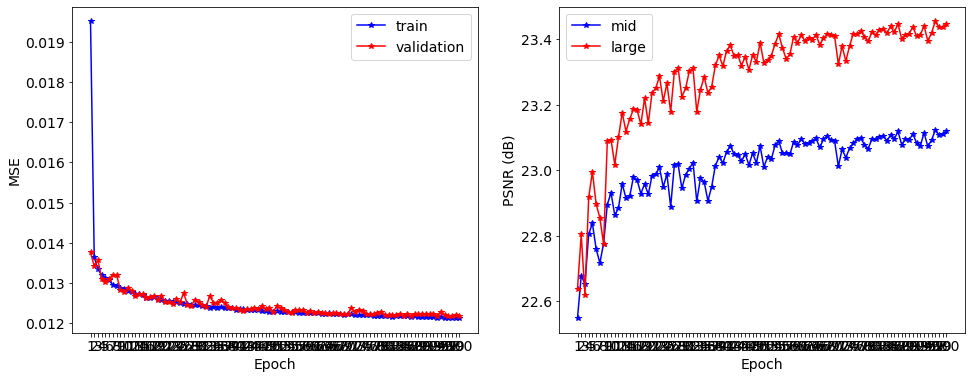

In [24]:
plot_log(log_residualnet)

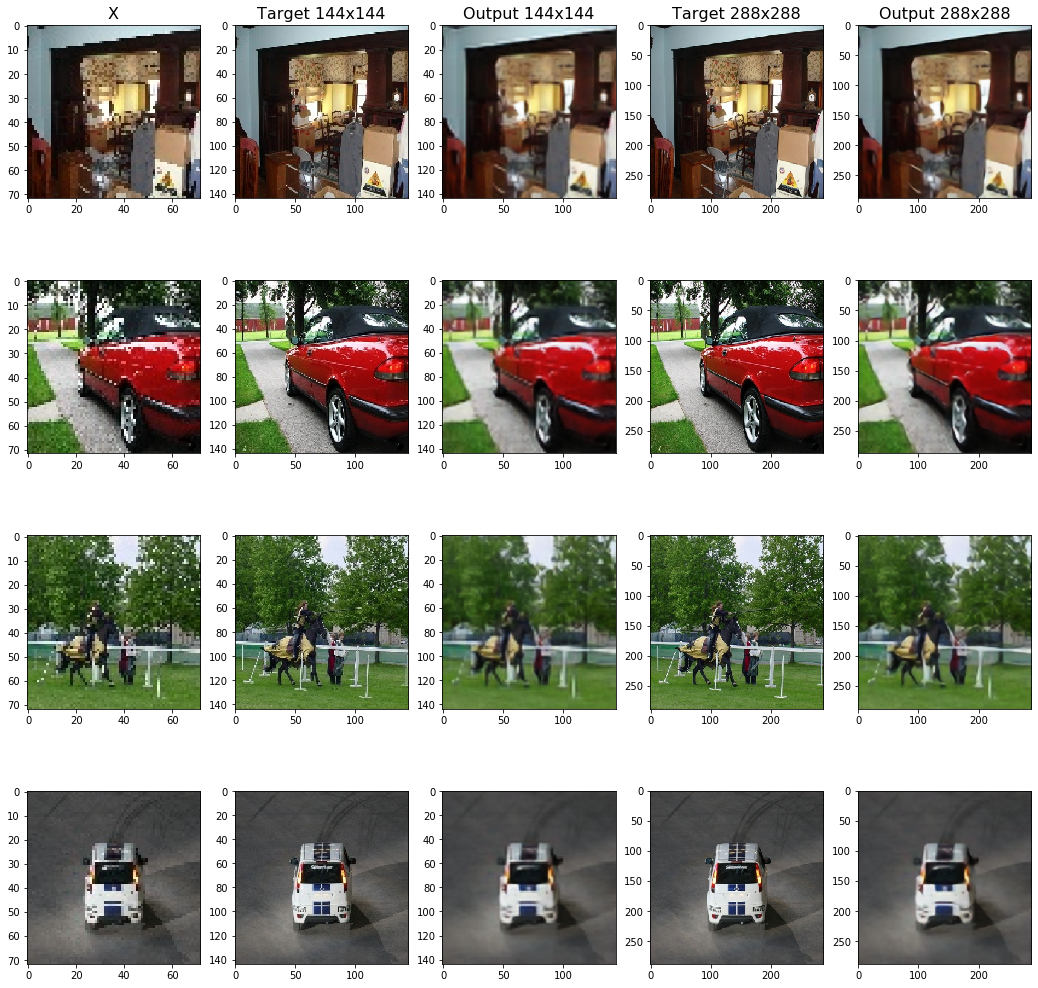

In [25]:
plot_samples(residualnet, valloader)

## Step 5

In [26]:
dilatednet = nets.DilatedNet()
optimizer = optim.Adam(dilatednet.parameters())

In [27]:
log_dilatednet = train_eval_two_outputs(trainloader, 
                                      valloader, 
                                      dilatednet, 
                                      criterion, 
                                      optimizer, 
                                      num_epochs=EPOCHS)

torch.save(dilatednet, os.path.join(models_path, 'dilatednet.pt'))


===> Epoch 1 Complete: Avg. Loss: 0.0225



===> Avg. PSNR-Mid: 22.3835 dB, Avg. PSNR-Large: 22.3293 dB



===> Epoch 2 Complete: Avg. Loss: 0.0141



===> Avg. PSNR-Mid: 22.6253 dB, Avg. PSNR-Large: 22.7211 dB



===> Epoch 3 Complete: Avg. Loss: 0.0137



===> Avg. PSNR-Mid: 22.7147 dB, Avg. PSNR-Large: 22.7839 dB



===> Epoch 4 Complete: Avg. Loss: 0.0133



===> Avg. PSNR-Mid: 22.7459 dB, Avg. PSNR-Large: 22.8545 dB



===> Epoch 5 Complete: Avg. Loss: 0.0132



===> Avg. PSNR-Mid: 22.8136 dB, Avg. PSNR-Large: 22.9307 dB



===> Epoch 6 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.8573 dB, Avg. PSNR-Large: 23.0469 dB



===> Epoch 7 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.7956 dB, Avg. PSNR-Large: 22.9681 dB



===> Epoch 8 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8239 dB, Avg. PSNR-Large: 23.0060 dB



===> Epoch 9 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.7505 dB, Avg. PSNR-Large: 22.8241 dB



===> Epoch 10 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.8796 dB, Avg. PSNR-Large: 23.0313 dB



===> Epoch 11 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.8093 dB, Avg. PSNR-Large: 22.8966 dB



===> Epoch 12 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9632 dB, Avg. PSNR-Large: 23.2210 dB



===> Epoch 13 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9004 dB, Avg. PSNR-Large: 23.1218 dB



===> Epoch 14 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9263 dB, Avg. PSNR-Large: 23.0872 dB



===> Epoch 15 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9040 dB, Avg. PSNR-Large: 23.0648 dB



===> Epoch 16 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9730 dB, Avg. PSNR-Large: 23.2310 dB



===> Epoch 17 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9676 dB, Avg. PSNR-Large: 23.1973 dB



===> Epoch 18 Complete: Avg. Loss: 0.0125



===> Avg. PSNR-Mid: 22.9239 dB, Avg. PSNR-Large: 23.1320 dB



===> Epoch 19 Complete: Avg. Loss: 0.0125



===> Avg. PSNR-Mid: 23.0020 dB, Avg. PSNR-Large: 23.2552 dB



===> Epoch 20 Complete: Avg. Loss: 0.0125



===> Avg. PSNR-Mid: 23.0471 dB, Avg. PSNR-Large: 23.3347 dB



===> Epoch 21 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 22.9658 dB, Avg. PSNR-Large: 23.2493 dB



===> Epoch 22 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 23.0055 dB, Avg. PSNR-Large: 23.2638 dB



===> Epoch 23 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 23.0068 dB, Avg. PSNR-Large: 23.2812 dB



===> Epoch 24 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 22.9431 dB, Avg. PSNR-Large: 23.1436 dB



===> Epoch 25 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0090 dB, Avg. PSNR-Large: 23.3082 dB



===> Epoch 26 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0703 dB, Avg. PSNR-Large: 23.3877 dB



===> Epoch 27 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0194 dB, Avg. PSNR-Large: 23.2694 dB



===> Epoch 28 Complete: Avg. Loss: 0.0124



===> Avg. PSNR-Mid: 22.9895 dB, Avg. PSNR-Large: 23.2581 dB



===> Epoch 29 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 22.9832 dB, Avg. PSNR-Large: 23.2297 dB



===> Epoch 30 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0066 dB, Avg. PSNR-Large: 23.2980 dB



===> Epoch 31 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0664 dB, Avg. PSNR-Large: 23.3791 dB



===> Epoch 32 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 22.9827 dB, Avg. PSNR-Large: 23.1936 dB



===> Epoch 33 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0426 dB, Avg. PSNR-Large: 23.3224 dB



===> Epoch 34 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0857 dB, Avg. PSNR-Large: 23.4163 dB



===> Epoch 35 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 22.7517 dB, Avg. PSNR-Large: 22.7205 dB



===> Epoch 36 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0132 dB, Avg. PSNR-Large: 23.2906 dB



===> Epoch 37 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0570 dB, Avg. PSNR-Large: 23.3259 dB



===> Epoch 38 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 22.9863 dB, Avg. PSNR-Large: 23.1965 dB



===> Epoch 39 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0488 dB, Avg. PSNR-Large: 23.3498 dB



===> Epoch 40 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 22.9646 dB, Avg. PSNR-Large: 23.1551 dB



===> Epoch 41 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0376 dB, Avg. PSNR-Large: 23.3273 dB



===> Epoch 42 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0663 dB, Avg. PSNR-Large: 23.3771 dB



===> Epoch 43 Complete: Avg. Loss: 0.0123



===> Avg. PSNR-Mid: 23.0707 dB, Avg. PSNR-Large: 23.3744 dB



===> Epoch 44 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 22.9043 dB, Avg. PSNR-Large: 23.1512 dB



===> Epoch 45 Complete: Avg. Loss: 0.0122



===> Avg. PSNR-Mid: 23.0960 dB, Avg. PSNR-Large: 23.4218 dB



===> Epoch 46 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0969 dB, Avg. PSNR-Large: 23.4192 dB



===> Epoch 47 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0822 dB, Avg. PSNR-Large: 23.3852 dB



===> Epoch 48 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0619 dB, Avg. PSNR-Large: 23.3736 dB



===> Epoch 49 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0797 dB, Avg. PSNR-Large: 23.4106 dB



===> Epoch 50 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0752 dB, Avg. PSNR-Large: 23.3890 dB



===> Epoch 51 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 22.9710 dB, Avg. PSNR-Large: 23.2082 dB



===> Epoch 52 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0313 dB, Avg. PSNR-Large: 23.2941 dB



===> Epoch 53 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0996 dB, Avg. PSNR-Large: 23.4344 dB



===> Epoch 54 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0885 dB, Avg. PSNR-Large: 23.4029 dB



===> Epoch 55 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0834 dB, Avg. PSNR-Large: 23.4014 dB



===> Epoch 56 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0865 dB, Avg. PSNR-Large: 23.4169 dB



===> Epoch 57 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 22.9760 dB, Avg. PSNR-Large: 23.2505 dB



===> Epoch 58 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0983 dB, Avg. PSNR-Large: 23.4212 dB



===> Epoch 59 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0710 dB, Avg. PSNR-Large: 23.4077 dB



===> Epoch 60 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0881 dB, Avg. PSNR-Large: 23.4139 dB



===> Epoch 61 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.1028 dB, Avg. PSNR-Large: 23.4389 dB



===> Epoch 62 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.1090 dB, Avg. PSNR-Large: 23.4571 dB



===> Epoch 63 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1074 dB, Avg. PSNR-Large: 23.4320 dB



===> Epoch 64 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0918 dB, Avg. PSNR-Large: 23.4124 dB



===> Epoch 65 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 23.0637 dB, Avg. PSNR-Large: 23.3735 dB



===> Epoch 66 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1220 dB, Avg. PSNR-Large: 23.4533 dB



===> Epoch 67 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0698 dB, Avg. PSNR-Large: 23.4127 dB



===> Epoch 68 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1180 dB, Avg. PSNR-Large: 23.4590 dB



===> Epoch 69 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0808 dB, Avg. PSNR-Large: 23.4051 dB



===> Epoch 70 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0643 dB, Avg. PSNR-Large: 23.3474 dB



===> Epoch 71 Complete: Avg. Loss: 0.0121



===> Avg. PSNR-Mid: 22.9604 dB, Avg. PSNR-Large: 23.2692 dB



===> Epoch 72 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1154 dB, Avg. PSNR-Large: 23.4400 dB



===> Epoch 73 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0914 dB, Avg. PSNR-Large: 23.4329 dB



===> Epoch 74 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1241 dB, Avg. PSNR-Large: 23.4640 dB



===> Epoch 75 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0795 dB, Avg. PSNR-Large: 23.3740 dB



===> Epoch 76 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1041 dB, Avg. PSNR-Large: 23.4456 dB



===> Epoch 77 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1224 dB, Avg. PSNR-Large: 23.4728 dB



===> Epoch 78 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0837 dB, Avg. PSNR-Large: 23.3921 dB



===> Epoch 79 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1059 dB, Avg. PSNR-Large: 23.4370 dB



===> Epoch 80 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0637 dB, Avg. PSNR-Large: 23.4261 dB



===> Epoch 81 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0477 dB, Avg. PSNR-Large: 23.3719 dB



===> Epoch 82 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1126 dB, Avg. PSNR-Large: 23.4537 dB



===> Epoch 83 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0634 dB, Avg. PSNR-Large: 23.3804 dB



===> Epoch 84 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1227 dB, Avg. PSNR-Large: 23.4660 dB



===> Epoch 85 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0613 dB, Avg. PSNR-Large: 23.3838 dB



===> Epoch 86 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.0898 dB, Avg. PSNR-Large: 23.4224 dB



===> Epoch 87 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1083 dB, Avg. PSNR-Large: 23.4522 dB



===> Epoch 88 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.1287 dB, Avg. PSNR-Large: 23.4762 dB



===> Epoch 89 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.1183 dB, Avg. PSNR-Large: 23.4657 dB



===> Epoch 90 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.1204 dB, Avg. PSNR-Large: 23.4632 dB



===> Epoch 91 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.1022 dB, Avg. PSNR-Large: 23.4322 dB



===> Epoch 92 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.1304 dB, Avg. PSNR-Large: 23.4599 dB



===> Epoch 93 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.0915 dB, Avg. PSNR-Large: 23.3987 dB



===> Epoch 94 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.0964 dB, Avg. PSNR-Large: 23.4287 dB



===> Epoch 95 Complete: Avg. Loss: 0.0120



===> Avg. PSNR-Mid: 23.1179 dB, Avg. PSNR-Large: 23.4652 dB



===> Epoch 96 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.0955 dB, Avg. PSNR-Large: 23.4122 dB



===> Epoch 97 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.1117 dB, Avg. PSNR-Large: 23.4454 dB



===> Epoch 98 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.0996 dB, Avg. PSNR-Large: 23.4206 dB



===> Epoch 99 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.1279 dB, Avg. PSNR-Large: 23.4674 dB



===> Epoch 100 Complete: Avg. Loss: 0.0119



===> Avg. PSNR-Mid: 23.1278 dB, Avg. PSNR-Large: 23.4758 dB


C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DilatedNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Dilated_Block. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


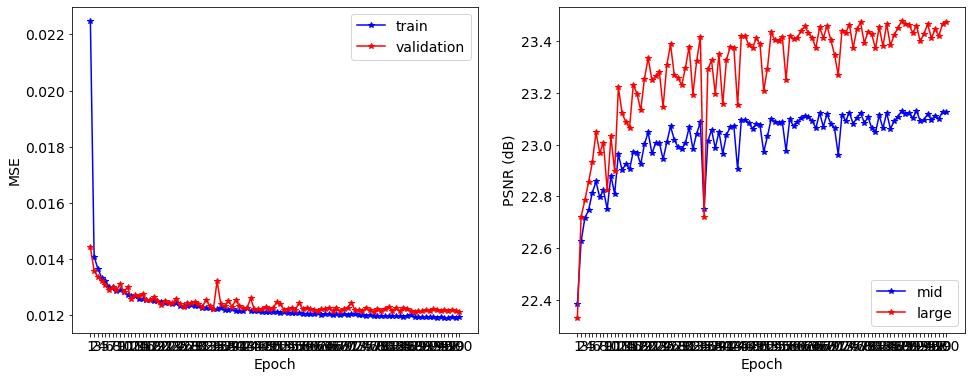

In [28]:
plot_log(log_dilatednet)

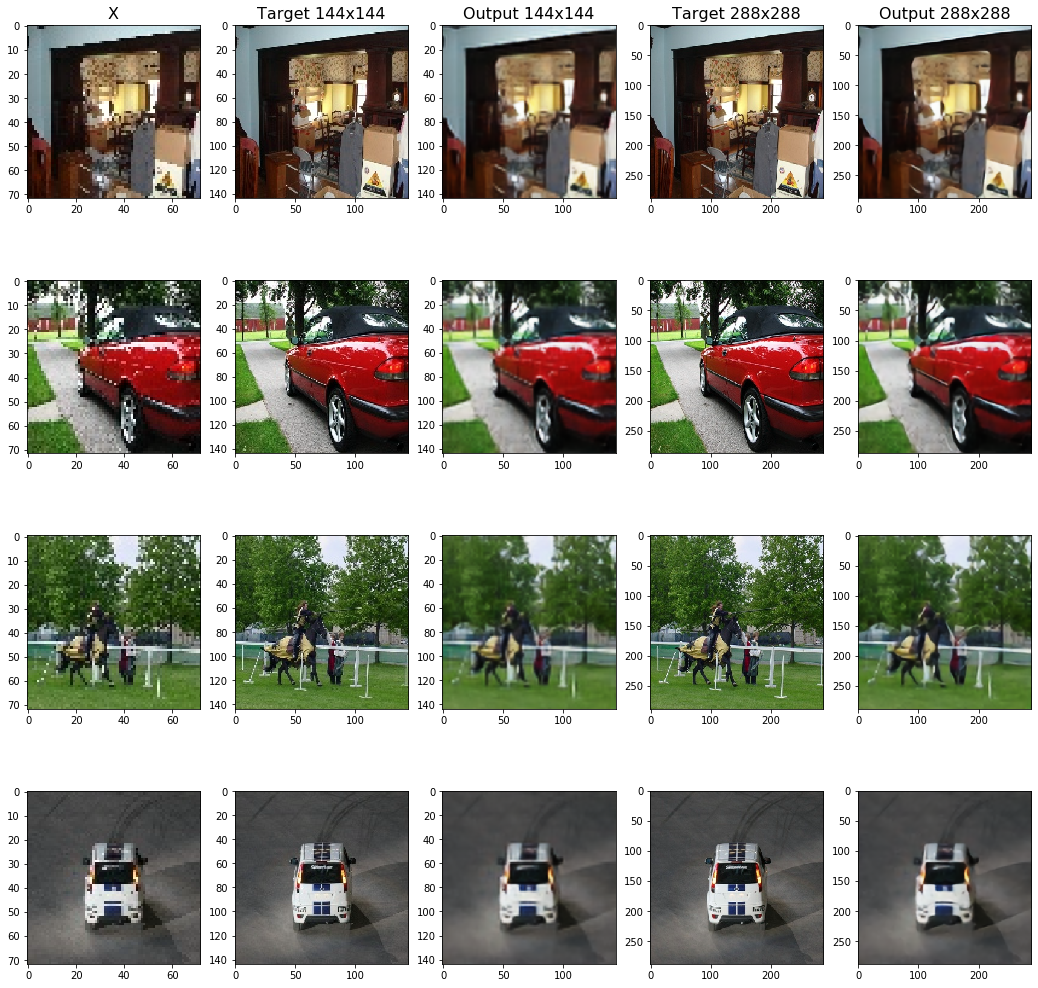

In [29]:
plot_samples(dilatednet, valloader)

## Step 6

In [30]:
pretrainednet = nets.PreTrainedNet()
optimizer = optim.Adam(pretrainednet.parameters())

In [31]:
log_pretrainednet = train_eval_two_outputs(trainloader, 
                                      valloader, 
                                      pretrainednet, 
                                      criterion, 
                                      optimizer, 
                                      num_epochs=EPOCHS)

torch.save(pretrainednet, os.path.join(models_path, 'pretrainednet.pt'))


===> Epoch 1 Complete: Avg. Loss: 0.0231



===> Avg. PSNR-Mid: 22.2146 dB, Avg. PSNR-Large: 22.3500 dB



===> Epoch 2 Complete: Avg. Loss: 0.0140



===> Avg. PSNR-Mid: 22.5342 dB, Avg. PSNR-Large: 22.6641 dB



===> Epoch 3 Complete: Avg. Loss: 0.0135



===> Avg. PSNR-Mid: 22.7084 dB, Avg. PSNR-Large: 22.8427 dB



===> Epoch 4 Complete: Avg. Loss: 0.0133



===> Avg. PSNR-Mid: 22.7614 dB, Avg. PSNR-Large: 22.8932 dB



===> Epoch 5 Complete: Avg. Loss: 0.0132



===> Avg. PSNR-Mid: 22.7234 dB, Avg. PSNR-Large: 22.8613 dB



===> Epoch 6 Complete: Avg. Loss: 0.0132



===> Avg. PSNR-Mid: 22.6730 dB, Avg. PSNR-Large: 22.7978 dB



===> Epoch 7 Complete: Avg. Loss: 0.0131



===> Avg. PSNR-Mid: 22.7972 dB, Avg. PSNR-Large: 22.9301 dB



===> Epoch 8 Complete: Avg. Loss: 0.0131



===> Avg. PSNR-Mid: 22.7894 dB, Avg. PSNR-Large: 22.9242 dB



===> Epoch 9 Complete: Avg. Loss: 0.0131



===> Avg. PSNR-Mid: 22.8197 dB, Avg. PSNR-Large: 22.9699 dB



===> Epoch 10 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.8183 dB, Avg. PSNR-Large: 22.9601 dB



===> Epoch 11 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.8610 dB, Avg. PSNR-Large: 23.0059 dB



===> Epoch 12 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.8566 dB, Avg. PSNR-Large: 23.0050 dB



===> Epoch 13 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.8502 dB, Avg. PSNR-Large: 22.9917 dB



===> Epoch 14 Complete: Avg. Loss: 0.0130



===> Avg. PSNR-Mid: 22.8398 dB, Avg. PSNR-Large: 22.9891 dB



===> Epoch 15 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8866 dB, Avg. PSNR-Large: 23.0336 dB



===> Epoch 16 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8752 dB, Avg. PSNR-Large: 23.0083 dB



===> Epoch 17 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8971 dB, Avg. PSNR-Large: 23.0355 dB



===> Epoch 18 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8519 dB, Avg. PSNR-Large: 22.9998 dB



===> Epoch 19 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.9192 dB, Avg. PSNR-Large: 23.0651 dB



===> Epoch 20 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8757 dB, Avg. PSNR-Large: 23.0133 dB



===> Epoch 21 Complete: Avg. Loss: 0.0129



===> Avg. PSNR-Mid: 22.8684 dB, Avg. PSNR-Large: 23.0197 dB



===> Epoch 22 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9104 dB, Avg. PSNR-Large: 23.0608 dB



===> Epoch 23 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.8685 dB, Avg. PSNR-Large: 23.0410 dB



===> Epoch 24 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9426 dB, Avg. PSNR-Large: 23.0882 dB



===> Epoch 25 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9103 dB, Avg. PSNR-Large: 23.0533 dB



===> Epoch 26 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9046 dB, Avg. PSNR-Large: 23.0548 dB



===> Epoch 27 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9529 dB, Avg. PSNR-Large: 23.0961 dB



===> Epoch 28 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9042 dB, Avg. PSNR-Large: 23.0463 dB



===> Epoch 29 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9531 dB, Avg. PSNR-Large: 23.0939 dB



===> Epoch 30 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9397 dB, Avg. PSNR-Large: 23.0855 dB



===> Epoch 31 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9205 dB, Avg. PSNR-Large: 23.0768 dB



===> Epoch 32 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9427 dB, Avg. PSNR-Large: 23.0769 dB



===> Epoch 33 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9615 dB, Avg. PSNR-Large: 23.1032 dB



===> Epoch 34 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.9495 dB, Avg. PSNR-Large: 23.0981 dB



===> Epoch 35 Complete: Avg. Loss: 0.0128



===> Avg. PSNR-Mid: 22.6159 dB, Avg. PSNR-Large: 22.7801 dB



===> Epoch 36 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9664 dB, Avg. PSNR-Large: 23.1136 dB



===> Epoch 37 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9439 dB, Avg. PSNR-Large: 23.0944 dB



===> Epoch 38 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9751 dB, Avg. PSNR-Large: 23.1152 dB



===> Epoch 39 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9582 dB, Avg. PSNR-Large: 23.0924 dB



===> Epoch 40 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9641 dB, Avg. PSNR-Large: 23.1079 dB



===> Epoch 41 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9446 dB, Avg. PSNR-Large: 23.0850 dB



===> Epoch 42 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9710 dB, Avg. PSNR-Large: 23.1154 dB



===> Epoch 43 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9198 dB, Avg. PSNR-Large: 23.0618 dB



===> Epoch 44 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9442 dB, Avg. PSNR-Large: 23.0878 dB



===> Epoch 45 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9094 dB, Avg. PSNR-Large: 23.0470 dB



===> Epoch 46 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9329 dB, Avg. PSNR-Large: 23.0911 dB



===> Epoch 47 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9748 dB, Avg. PSNR-Large: 23.1163 dB



===> Epoch 48 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9799 dB, Avg. PSNR-Large: 23.1226 dB



===> Epoch 49 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9767 dB, Avg. PSNR-Large: 23.1113 dB



===> Epoch 50 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9811 dB, Avg. PSNR-Large: 23.1200 dB



===> Epoch 51 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9905 dB, Avg. PSNR-Large: 23.1320 dB



===> Epoch 52 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9549 dB, Avg. PSNR-Large: 23.1018 dB



===> Epoch 53 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 23.0002 dB, Avg. PSNR-Large: 23.1423 dB



===> Epoch 54 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9300 dB, Avg. PSNR-Large: 23.0701 dB



===> Epoch 55 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9782 dB, Avg. PSNR-Large: 23.1272 dB



===> Epoch 56 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9616 dB, Avg. PSNR-Large: 23.1103 dB



===> Epoch 57 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 23.0002 dB, Avg. PSNR-Large: 23.1427 dB



===> Epoch 58 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9529 dB, Avg. PSNR-Large: 23.0936 dB



===> Epoch 59 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9998 dB, Avg. PSNR-Large: 23.1451 dB



===> Epoch 60 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9911 dB, Avg. PSNR-Large: 23.1403 dB



===> Epoch 61 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 23.0034 dB, Avg. PSNR-Large: 23.1471 dB



===> Epoch 62 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 23.0041 dB, Avg. PSNR-Large: 23.1504 dB



===> Epoch 63 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9616 dB, Avg. PSNR-Large: 23.0954 dB



===> Epoch 64 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9805 dB, Avg. PSNR-Large: 23.1298 dB



===> Epoch 65 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9987 dB, Avg. PSNR-Large: 23.1406 dB



===> Epoch 66 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9820 dB, Avg. PSNR-Large: 23.1288 dB



===> Epoch 67 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 23.0121 dB, Avg. PSNR-Large: 23.1616 dB



===> Epoch 68 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0087 dB, Avg. PSNR-Large: 23.1513 dB



===> Epoch 69 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9637 dB, Avg. PSNR-Large: 23.1058 dB



===> Epoch 70 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9979 dB, Avg. PSNR-Large: 23.1321 dB



===> Epoch 71 Complete: Avg. Loss: 0.0127



===> Avg. PSNR-Mid: 22.9369 dB, Avg. PSNR-Large: 23.0746 dB



===> Epoch 72 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.8719 dB, Avg. PSNR-Large: 23.0227 dB



===> Epoch 73 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0056 dB, Avg. PSNR-Large: 23.1481 dB



===> Epoch 74 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9811 dB, Avg. PSNR-Large: 23.1184 dB



===> Epoch 75 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9994 dB, Avg. PSNR-Large: 23.1467 dB



===> Epoch 76 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0235 dB, Avg. PSNR-Large: 23.1666 dB



===> Epoch 77 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0069 dB, Avg. PSNR-Large: 23.1525 dB



===> Epoch 78 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9819 dB, Avg. PSNR-Large: 23.1228 dB



===> Epoch 79 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9199 dB, Avg. PSNR-Large: 23.0883 dB



===> Epoch 80 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9829 dB, Avg. PSNR-Large: 23.1223 dB



===> Epoch 81 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9825 dB, Avg. PSNR-Large: 23.1153 dB



===> Epoch 82 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0085 dB, Avg. PSNR-Large: 23.1534 dB



===> Epoch 83 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0070 dB, Avg. PSNR-Large: 23.1458 dB



===> Epoch 84 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0134 dB, Avg. PSNR-Large: 23.1567 dB



===> Epoch 85 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9576 dB, Avg. PSNR-Large: 23.0880 dB



===> Epoch 86 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9924 dB, Avg. PSNR-Large: 23.1297 dB



===> Epoch 87 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9449 dB, Avg. PSNR-Large: 23.0854 dB



===> Epoch 88 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0119 dB, Avg. PSNR-Large: 23.1581 dB



===> Epoch 89 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0246 dB, Avg. PSNR-Large: 23.1639 dB



===> Epoch 90 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0072 dB, Avg. PSNR-Large: 23.1515 dB



===> Epoch 91 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0321 dB, Avg. PSNR-Large: 23.1775 dB



===> Epoch 92 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9219 dB, Avg. PSNR-Large: 23.0529 dB



===> Epoch 93 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9878 dB, Avg. PSNR-Large: 23.1234 dB



===> Epoch 94 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0259 dB, Avg. PSNR-Large: 23.1711 dB



===> Epoch 95 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0098 dB, Avg. PSNR-Large: 23.1532 dB



===> Epoch 96 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9427 dB, Avg. PSNR-Large: 23.0657 dB



===> Epoch 97 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0197 dB, Avg. PSNR-Large: 23.1663 dB



===> Epoch 98 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0315 dB, Avg. PSNR-Large: 23.1765 dB



===> Epoch 99 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 22.9801 dB, Avg. PSNR-Large: 23.1227 dB



===> Epoch 100 Complete: Avg. Loss: 0.0126



===> Avg. PSNR-Mid: 23.0339 dB, Avg. PSNR-Large: 23.1714 dB


C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type PreTrainedNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type VGG19. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\guyja\Anaconda3\envs\py4dp\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


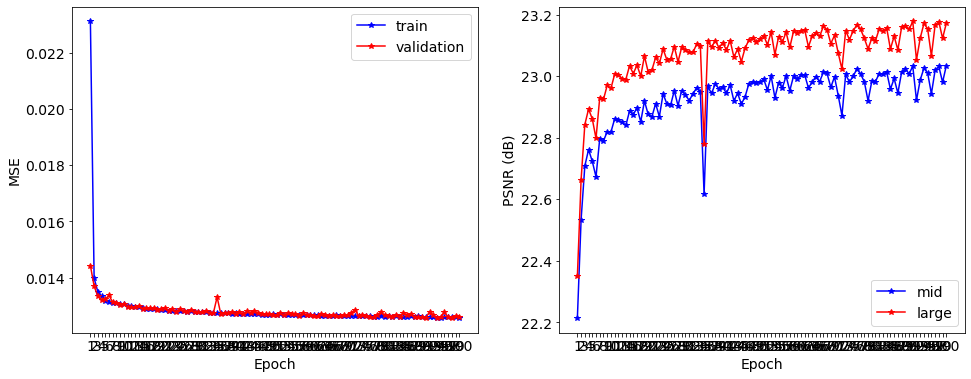

In [32]:
plot_log(log_pretrainednet)

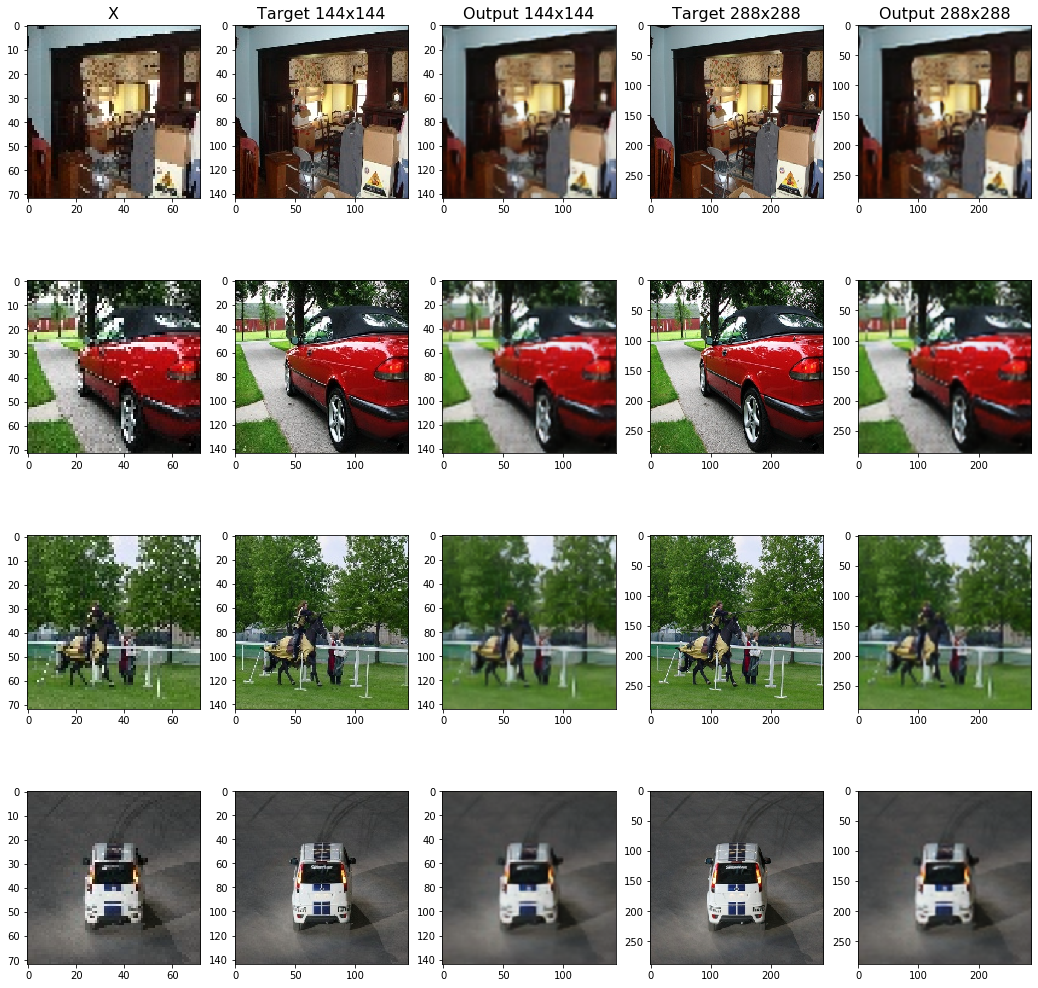

In [33]:
plot_samples(pretrainednet, valloader)